<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Funciones de Bessel de orden real ( jv, jn_zeros) 

Las funciones de Bessel son una familia de soluciones para la ecuación diferencial de Bessel con alfa de orden real o complejo:
$$x^2 \frac{d^2y}{dx^2} + x \frac{dy}{dx} + (x^2-\alpha^2) y = 0$$

Entre otros usos, estas funciones surgen en problemas de propagación de ondas, como los modos de vibración de un cabezal de tambor delgado. 

### Función de Bessel de orden cero, uno y demás


`Scipy` dispone de un paquete muy interesante llamado special donde se encuentran funciones como `airy` o `bessel`, http://docs.scipy.org/doc/scipy/reference/tutorial/special.html.  
 
La ecuación diferencial de Bessel viene definida por,

$$x^{2}+\frac{d^{2}}{dx^{2}}+x\frac{dy}{dc}+\left(x^{2}-\alpha^{2}\right)y=0$$
si $\alpha \epsilon \mathbb{N}$,
$$x^{2}+\frac{d^{2}}{dx^{2}}+x\frac{dy}{dc}+\left(x^{2}-n^{2}\right)y=0$$
cuya solución es,
$$J_{n}\left(x\right)=\sum_{k=0}^{\infty}\frac{\left(-1\right)^{k}\left(\frac{x}{2}\right)^{n+2k}}{k!\left(n+k\right)!}$$

para $n = 0$ y $n = 1$ obtenemos las funciones de Bessel de orden 0 y 1. Estas funciones son de gran importancia ya que las funciones del resto de ordenes se pueden escribir en función de estas dos.

$$J_{0}\left(x\right)=1-\frac{\left(\frac{x}{2}\right)^{2}}{\left(1!\right)^{2}}+\frac{\left(\frac{x}{2}\right)^{4}}{\left(2!\right)^{2}}-\frac{\left(\frac{x}{2}\right)^{6}}{\left(3!\right)^{2}}+\cdots$$

$$J_{1}\left(x\right)=\frac{x}{2}\left[1-\frac{\left(\frac{x}{2}\right)^{2}}{\left(1!2!\right)^{2}}+\frac{\left(\frac{x}{2}\right)^{4}}{\left(2!3!\right)^{2}}-\frac{\left(\frac{x}{2}\right)^{6}}{\left(3!4!\right)^{2}}+\cdots\right]$$



Cálculemos los coeficientes de orden cero, uno y demás de la función de Bessel 
contenida en el paquete special.

In [4]:
from scipy import special                   # Importamos scipy.special
import scipy as sp                          # Importamos scipy como el alias sp
import matplotlib.pyplot as plt             # Importamos matplotlib.pyplot como el alias plt.

# Creamos el array dimensional
x = sp.arange(0,50,.1)

# Calculamos los coeficientes de orden cero.
j0 = special.j0(x)

# Calculamos los coeficientes de orden uno.
j1 = special.j1(x)

# Calculamos los coeficientes de orden dos.
j2 = special.jn(2, x)

# Calculamos los coeficientes de orden tres.
j3 = special.jn(3, x)

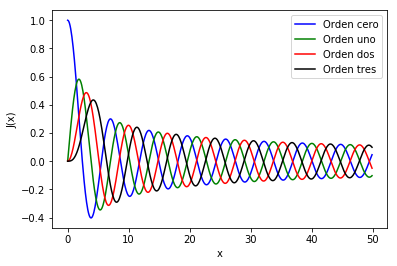

In [5]:
# Dibujamos la función de Bessel de orden cero.
plt.plot(x,j0,'b', label = 'Orden cero')


# Dibujamos la función de Bessel de orden uno.
plt.plot(x,j1,'g', label = 'Orden uno')

# Dibujamos la función de Bessel de orden dos.
plt.plot(x,j2,'r', label = 'Orden dos')

# Dibujamos la función de Bessel de orden tres.
plt.plot(x,j3,'k', label = 'Orden tres')

# Añadimos la leyenda
plt.legend()
plt.xlabel('x')
plt.ylabel('J(x)')

# Mostramos la gráfica
plt.show()

### Aquí hay un ejemplo de una cabeza de tambor circular anclada en el borde:

In [11]:
# from scipy import special
import numpy as np

In [25]:
def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]   # Guardo el último, por eso uso [-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

__scipy.special.jn_zeros(n, nt)__  
Calcule los ceros de la función de Bessel de orden entero Jn (x).  
Parámetros:  
`n` int Orden de la función de Bessel   
`nt` int Número de ceros a devolver

In [52]:
print(special.jn_zeros(0, 5))

[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771]


In [47]:
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

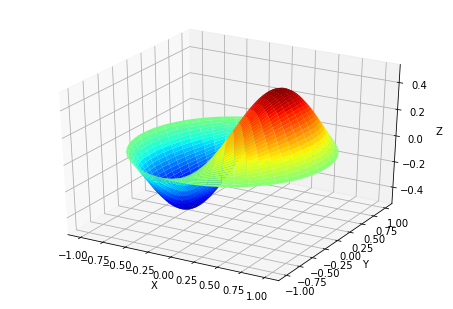

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()